# Regresión con Árboles de Decisión

## Importar las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# cargar los datos
boston = datasets.load_boston()

In [3]:
# Transformar a dataframe para visualizar
col_names = list(boston.feature_names)
col_names.append('TARGET')
df = pd.DataFrame(np.c_[boston.data, boston.target], columns=col_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [4]:
print('Información en el dataset:')
print(boston.keys())
print()

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])



In [5]:
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [6]:
print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
#Seleccionamos solamente la columna 6 del dataset
X_adr = boston.data[:, np.newaxis, 5]
X_adr

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [9]:
#Defino los datos correspondientes a las etiquetas
y_adr = boston.target

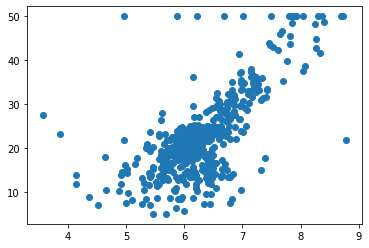

In [10]:
#Graficamos los datos correspondientes
plt.scatter(X_adr, y_adr)
plt.show()

In [11]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)

In [12]:
#Defino el algoritmo a utilizar
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth = 5)

In [13]:
#Entreno el modelo
adr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [14]:
#Realizo una predicción
Y_pred = adr.predict(X_test)
print(Y_pred)

[13.672      19.57083333 24.96904762 19.57083333 49.78571429 49.78571429
 24.96904762 19.57083333 19.57083333 19.57083333 19.57083333 19.57083333
 15.325      19.57083333 33.48214286 33.48214286 19.57083333 24.96904762
 13.672      19.57083333 19.57083333 19.57083333 19.57083333 19.57083333
 18.02142857 15.325      19.57083333 19.57083333 19.57083333 33.48214286
 23.56       19.57083333 13.672      19.57083333 18.02142857 18.02142857
 18.02142857 18.02142857 19.57083333 19.57083333 19.57083333 24.96904762
 19.57083333 19.57083333 19.57083333 37.         19.57083333 31.7
 13.672       9.12       24.96904762 46.025      31.7        19.57083333
 19.57083333 19.57083333 19.57083333 19.57083333 19.57083333 19.57083333
 11.25       33.48214286 19.57083333 24.96904762 29.025      19.57083333
 19.57083333 15.325      19.57083333 13.672       9.12       19.57083333
 33.48214286 24.96904762 19.57083333 46.025      13.672      19.57083333
 33.48214286 19.57083333 18.02142857 15.325      15.325   

In [16]:
print(y_test)

[17.8 50.  26.5 21.7 45.4 43.8 15.2 24.4 18.9 28.7 19.4 15.6 19.5 19.5
 30.3 15.  19.6 28.7 11.9 22.9 19.2 24.4 18.4 24.4 16.2 21.  19.1 11.7
 23.5 32.2 20.6 23.  14.6 20.1 17.2 15.6 17.6 15.  18.9 15.4 19.1 28.6
 27.1 10.9 21.5 26.7  8.4 33.2 11.8 20.2 30.1 50.  33.4 22.2 18.5 15.
 19.4 16.7 24.7 25.  33.1 36.  29.4 28.4 27.5 23.7 22.2 22.6 18.7 19.7
 15.6 22.6 37.9 13.3  8.3 41.7 16.1 24.3 34.9 22.9 18.3 17.3 19.9 12.3
 13.6 50.  12.1 23.3 33.3 42.8 22.5 25.  23.6 23.1  7.  29.6 20.  20.4
 20.  22.8 15.2 43.5]


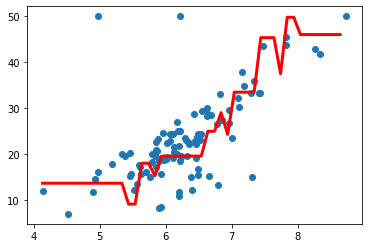

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.7129853840220517


In [15]:
#Graficamos los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.show()
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(adr.score(X_train, y_train))